# Step 1 : Data Collection (Webscraping, using Python beautiful soup)

In [565]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

pd.set_option('display.max_colwidth', None)


In [450]:
URL = "https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/match-schedule-fixtures-and-results"
response = requests.get(URL)
print(response)

<Response [200]>


In [451]:
soup = BeautifulSoup(response.text, 'html.parser')

In [452]:
main_div = soup.find('div', class_='ds-mb-4')

In [453]:
span_element = main_div.find('p', class_='ds-text-tight-m ds-font-bold ds-capitalize ds-truncate')
team_name = span_element.text
team_name

'England'

In [454]:
team_names = []  

team_elements = soup.find_all('p', class_='ds-text-tight-m ds-font-bold ds-capitalize ds-truncate')

for span_element in team_elements:
    team_name = span_element.text
    team_names.append(team_name)

print(team_names)


['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan', 'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India', 'New Zealand', 'Netherlands', 'England', 'Bangladesh', 'Sri Lanka', 'Pakistan', 'Afghanistan', 'India', 'South Africa', 'Australia', 'Bangladesh', 'New Zealand', 'Pakistan', 'India', 'Afghanistan', 'England', 'Sri Lanka', 'Australia', 'Netherlands', 'South Africa', 'New Zealand', 'Afghanistan', 'Bangladesh', 'India', 'Australia', 'Pakistan', 'Netherlands', 'Sri Lanka', 'South Africa', 'England', 'New Zealand', 'India', 'Pakistan', 'Afghanistan', 'South Africa', 'Bangladesh', 'Australia', 'Netherlands', 'England', 'Sri Lanka', 'Pakistan', 'South Africa', 'Australia', 'New Zealand', 'Netherlands', 'Bangladesh', 'India', 'England', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'Pakistan', 'South Africa', 'New Zealand', 'India', 'Sri Lanka', 'Netherlands', 'Afghanistan', 'New Zealand', 'Pakistan', 'Australia', 'England', 'India', 'South Africa', 'Sri Lanka', 'Ba

In [455]:
team_names = []
team_elements = soup.find_all('p', class_='ds-text-tight-m ds-font-bold ds-capitalize ds-truncate')

team1_names = []
team2_names = []
current_team = 1 

for span_element in team_elements:
    team_name = span_element.text
    
    if current_team == 1:
        team1_names.append(team_name)
        current_team = 2  
    else:
        team2_names.append(team_name)
        current_team = 1  

print("Team 1 Names:", team1_names)
print("Team 2 Names:", team2_names)


Team 1 Names: ['England', 'Pakistan', 'Afghanistan', 'South Africa', 'Australia', 'New Zealand', 'England', 'Sri Lanka', 'Afghanistan', 'South Africa', 'Bangladesh', 'Pakistan', 'Afghanistan', 'Sri Lanka', 'Netherlands', 'New Zealand', 'Bangladesh', 'Australia', 'Netherlands', 'South Africa', 'New Zealand', 'Pakistan', 'South Africa', 'Australia', 'England', 'Pakistan', 'Australia', 'Netherlands', 'India', 'Sri Lanka', 'Bangladesh', 'South Africa', 'India', 'Netherlands', 'New Zealand', 'Australia', 'India', 'Sri Lanka', 'Afghanistan', 'England', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'England', 'India', 'India', 'South Africa', 'India']
Team 2 Names: ['New Zealand', 'Netherlands', 'Bangladesh', 'Sri Lanka', 'India', 'Netherlands', 'Bangladesh', 'Pakistan', 'India', 'Australia', 'New Zealand', 'India', 'England', 'Australia', 'South Africa', 'Afghanistan', 'India', 'Pakistan', 'Sri Lanka', 'England', 'India', 'Afghanistan', 'Bangladesh', 'Netherlands', 'Sri Lanka', 'South Africa', '

In [456]:
elements = soup.find_all('p', class_='ds-text-tight-s ds-font-regular ds-line-clamp-2 ds-text-typo')

extracted_texts = []

for element in elements:
    try:
        text = element.text
        extracted_texts.append(text)
    except AttributeError:
        extracted_texts.append("NA")

print(extracted_texts)
df_result = pd.DataFrame(extracted_texts)

['New Zealand won by 9 wickets (with 82 balls remaining)', 'Pakistan won by 81 runs', 'Bangladesh won by 6 wickets (with 92 balls remaining)', 'South Africa won by 102 runs', 'India won by 6 wickets (with 52 balls remaining)', 'New Zealand won by 99 runs', 'England won by 137 runs', 'Pakistan won by 6 wickets (with 10 balls remaining)', 'India won by 8 wickets (with 90 balls remaining)', 'South Africa won by 134 runs', 'New Zealand won by 8 wickets (with 43 balls remaining)', 'India won by 7 wickets (with 117 balls remaining)', 'Afghanistan won by 69 runs', 'Australia won by 5 wickets (with 88 balls remaining)', 'Netherlands won by 38 runs', 'New Zealand won by 149 runs', 'India won by 7 wickets (with 51 balls remaining)', 'Australia won by 62 runs', 'Sri Lanka won by 5 wickets (with 10 balls remaining)', 'South Africa won by 229 runs', 'India won by 4 wickets (with 12 balls remaining)', 'Afghanistan won by 8 wickets (with 6 balls remaining)', 'South Africa won by 149 runs', 'Australia

In [457]:
data = {
    'Team 1': team1_names,
    'Team 2': team2_names,
    'Match': [f"{team1} vs {team2}" for team1, team2 in zip(team1_names, team2_names)],
    'Result': extracted_texts

}

In [458]:
df = pd.DataFrame(data)

In [459]:
df.head(2)

,Team 1,Team 2,Match,Result
0,England,New Zealand,England vs New Zealand,New Zealand won by 9 wickets (with 82 balls remaining)
1,Pakistan,Netherlands,Pakistan vs Netherlands,Pakistan won by 81 runs


In [460]:
all_links = soup.find_all('a', class_='ds-no-tap-higlight')


In [461]:
for link in all_links:
    href = link.get('href')
    if 'full-scorecard' in href:
        print(href)

/series/women-s-t20-quadrangular-series-in-hong-kong-2023-24-1407858/hong-kong-women-vs-tanzania-women-final-1407871/full-scorecard
/series/wbbl-2023-24-1387171/melbourne-stars-women-vs-brisbane-heat-women-47th-match-1387218/full-scorecard
/series/pakistan-cup-2023-24-1396833/karachi-region-whites-vs-peshawar-region-final-1396904/full-scorecard
/series/sheffield-shield-2023-24-1391768/victoria-vs-queensland-14th-match-1391783/full-scorecard
/series/women-s-t20-quadrangular-series-in-hong-kong-2023-24-1407858/japan-women-vs-nepal-women-3rd-place-play-off-1407870/full-scorecard
/series/wbbl-2023-24-1387171/melbourne-renegades-women-vs-hobart-hurricanes-women-46th-match-1387217/full-scorecard
/series/national-cricket-league-2023-24-1402725/dhaka-division-vs-dhaka-metropolis-tier-1-1402747/full-scorecard
/series/national-cricket-league-2023-24-1402725/rangpur-division-vs-sylhet-division-tier-1-1402748/full-scorecard
/series/national-cricket-league-2023-24-1402725/chattogram-division-vs-raj

In [462]:
all_links = soup.find_all('a', class_='ds-no-tap-higlight')

In [463]:
filtered_links = [link.get('href') for link in all_links if 'full-scorecard' in link.get('href')]

In [464]:
base_url = "https://www.espncricinfo.com"
complete_links = [base_url + link for link in filtered_links]

In [465]:
df_1 = pd.DataFrame({'Links': complete_links})

In [466]:
df_1 = df_1.iloc[10:]
df_1 = df_1.reset_index(drop=True)

In [467]:
Summary_df = pd.concat([df,df_1],axis=1)

In [468]:
Summary_df

,Team 1,Team 2,Match,Result,Links
0,England,New Zealand,England vs New Zealand,New Zealand won by 9 wickets (with 82 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/england-vs-new-zealand-1st-match-1384392/full-scorecard
1,Pakistan,Netherlands,Pakistan vs Netherlands,Pakistan won by 81 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-pakistan-2nd-match-1384393/full-scorecard
2,Afghanistan,Bangladesh,Afghanistan vs Bangladesh,Bangladesh won by 6 wickets (with 92 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/afghanistan-vs-bangladesh-3rd-match-1384394/full-scorecard
3,South Africa,Sri Lanka,South Africa vs Sri Lanka,South Africa won by 102 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/south-africa-vs-sri-lanka-4th-match-1384395/full-scorecard
4,Australia,India,Australia vs India,India won by 6 wickets (with 52 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-australia-5th-match-1384396/full-scorecard
5,New Zealand,Netherlands,New Zealand vs Netherlands,New Zealand won by 99 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-new-zealand-6th-match-1384397/full-scorecard
6,England,Bangladesh,England vs Bangladesh,England won by 137 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/bangladesh-vs-england-7th-match-1384398/full-scorecard
7,Sri Lanka,Pakistan,Sri Lanka vs Pakistan,Pakistan won by 6 wickets (with 10 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/pakistan-vs-sri-lanka-8th-match-1384399/full-scorecard
8,Afghanistan,India,Afghanistan vs India,India won by 8 wickets (with 90 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-afghanistan-9th-match-1384400/full-scorecard
9,South Africa,Australia,South Africa vs Australia,South Africa won by 134 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/australia-vs-south-africa-10th-match-1384401/full-scorecard


In [469]:
replacement_value = 'https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-australia-final-1384439/full-scorecard'

In [470]:

Summary_df = Summary_df.fillna(replacement_value)
Summary_df

,Team 1,Team 2,Match,Result,Links
0,England,New Zealand,England vs New Zealand,New Zealand won by 9 wickets (with 82 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/england-vs-new-zealand-1st-match-1384392/full-scorecard
1,Pakistan,Netherlands,Pakistan vs Netherlands,Pakistan won by 81 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-pakistan-2nd-match-1384393/full-scorecard
2,Afghanistan,Bangladesh,Afghanistan vs Bangladesh,Bangladesh won by 6 wickets (with 92 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/afghanistan-vs-bangladesh-3rd-match-1384394/full-scorecard
3,South Africa,Sri Lanka,South Africa vs Sri Lanka,South Africa won by 102 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/south-africa-vs-sri-lanka-4th-match-1384395/full-scorecard
4,Australia,India,Australia vs India,India won by 6 wickets (with 52 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-australia-5th-match-1384396/full-scorecard
5,New Zealand,Netherlands,New Zealand vs Netherlands,New Zealand won by 99 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-new-zealand-6th-match-1384397/full-scorecard
6,England,Bangladesh,England vs Bangladesh,England won by 137 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/bangladesh-vs-england-7th-match-1384398/full-scorecard
7,Sri Lanka,Pakistan,Sri Lanka vs Pakistan,Pakistan won by 6 wickets (with 10 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/pakistan-vs-sri-lanka-8th-match-1384399/full-scorecard
8,Afghanistan,India,Afghanistan vs India,India won by 8 wickets (with 90 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-afghanistan-9th-match-1384400/full-scorecard
9,South Africa,Australia,South Africa vs Australia,South Africa won by 134 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/australia-vs-south-africa-10th-match-1384401/full-scorecard


In [471]:
Summary_df.to_csv('matchresult.csv')

In [472]:
first_innings = pd.DataFrame()

for index, row in Summary_df.iterrows():
    scorecard_link = row['Links']
    
    try:
        response = requests.get(scorecard_link)
        response.raise_for_status()  

        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.select('table')

        if tables:
            df_3 = pd.read_html(str(tables[0]))[0]

            df_3 = df_3.dropna(how='all')

            team_span = soup.find('span', class_='ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate')
            if team_span:
                team_name = team_span.text.strip()
                df_3.insert(0, 'Team', team_name)

            df_3['Source_Link'] = scorecard_link

            first_innings = pd.concat([first_innings, df_3], ignore_index=True)
        else:
            print(f"No tables found on the page: {scorecard_link}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {scorecard_link}: {e}")

columns_to_drop = ['Unnamed: 8', 'Unnamed: 9', 'Source_Link']
first_innings = first_innings.drop(columns=columns_to_drop, errors='ignore')

first_innings = first_innings[~first_innings.apply(lambda row: 'Fall of wickets' in str(row), axis=1)]

first_innings = first_innings[~first_innings.apply(lambda row: 'Did not bat' in str(row), axis=1)]


In [473]:
first_innings.head(20)

,Team,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,England,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28
1,England,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33
2,England,Joe Root,b Phillips,77,86,140,4,1,89.53
3,England,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25
4,England,Moeen Ali,b Phillips,11,17,20,1,0,64.70
5,England,Jos Buttler (c)†,c †Latham b Henry,43,42,48,2,2,102.38
6,England,Liam Livingstone,c Henry b Boult,20,22,23,3,0,90.90
7,England,Sam Curran,c †Latham b Henry,14,19,30,0,0,73.68
8,England,Chris Woakes,c Young b Santner,11,12,15,1,0,91.66
9,England,Adil Rashid,not out,15,13,23,0,1,115.38


In [474]:
second_innings = pd.DataFrame()

for index, row in Summary_df.iterrows():
    scorecard_link = row['Links']
    
    try:
        response = requests.get(scorecard_link)
        response.raise_for_status()  

        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.select('table')

        # Check if there are at least three tables
        if len(tables) >= 3:
            # Assuming you want the third table for the second innings
            df_3 = pd.read_html(str(tables[2]))[0]

            df_3 = df_3.dropna(how='all')

            # Extract text from the second occurrence of the span element
            team_span = soup.find_all('span', class_='ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate')
            if len(team_span) >= 2:
                team_name = team_span[1].text.strip()
                df_3.insert(0, 'Team', team_name)

            df_3['Source_Link'] = scorecard_link

            second_innings = pd.concat([second_innings, df_3], ignore_index=True)
        else:
            print(f"Not enough tables found on the page for second innings: {scorecard_link}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {scorecard_link}: {e}")

columns_to_drop = ['Unnamed: 8', 'Unnamed: 9', 'Source_Link']
second_innings = second_innings.drop(columns=columns_to_drop, errors='ignore')

second_innings = second_innings[~second_innings.apply(lambda row: 'Fall of wickets' in str(row), axis=1)]

second_innings = second_innings[~second_innings.apply(lambda row: 'Did not bat' in str(row), axis=1)]

# Print the resulting DataFrame for the second innings
print("Second Innings DataFrame:\n", second_innings, "\n" + '='*50 + "\n")


Second Innings DataFrame:
             Team             BATTING           Unnamed: 1      R    B    M  \
0    New Zealand        Devon Conway              not out    152  121  147   
1    New Zealand          Will Young  c †Buttler b Curran      0    1    5   
2    New Zealand     Rachin Ravindra              not out    123   96  141   
3    New Zealand              Extras     (b 4, lb 1, w 3)      8  NaN  NaN   
4    New Zealand               TOTAL   36.2 Ov (RR: 7.78)  283/1  NaN  NaN   
..           ...                 ...                  ...    ...  ...  ...   
564    Australia        Steven Smith         lbw b Bumrah      4    9   11   
565    Australia  Marnus Labuschagne              not out     58  110  133   
566    Australia       Glenn Maxwell              not out      2    1    1   
567    Australia              Extras    (b 5, lb 2, w 11)     18  NaN  NaN   
568    Australia               TOTAL     43 Ov (RR: 5.60)  241/4  NaN  NaN   

      4s   6s      SR  
0     19    

In [475]:
second_innings

,Team,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,New Zealand,Devon Conway,not out,152,121,147,19,3,125.61
1,New Zealand,Will Young,c †Buttler b Curran,0,1,5,0,0,0.00
2,New Zealand,Rachin Ravindra,not out,123,96,141,11,5,128.12
3,New Zealand,Extras,"(b 4, lb 1, w 3)",8,NaN,NaN,NaN,NaN,NaN
4,New Zealand,TOTAL,36.2 Ov (RR: 7.78),283/1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
564,Australia,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44
565,Australia,Marnus Labuschagne,not out,58,110,133,4,0,52.72
566,Australia,Glenn Maxwell,not out,2,1,1,0,0,200.00
567,Australia,Extras,"(b 5, lb 2, w 11)",18,NaN,NaN,NaN,NaN,NaN


In [476]:
first_innings

,Team,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,England,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28
1,England,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33
2,England,Joe Root,b Phillips,77,86,140,4,1,89.53
3,England,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25
4,England,Moeen Ali,b Phillips,11,17,20,1,0,64.70
...,...,...,...,...,...,...,...,...,...
632,India,Jasprit Bumrah,lbw b Zampa,1,3,5,0,0,33.33
633,India,Kuldeep Yadav,run out (Labuschagne/Cummins),10,18,28,0,0,55.55
634,India,Mohammed Siraj,not out,9,8,13,1,0,112.50
635,India,Extras,"(lb 3, w 9)",12,NaN,NaN,NaN,NaN,NaN


In [477]:
first_innings.to_csv('Worldcup2023.csv')

In [478]:
second_innings.to_csv('Worldcup20232.csv')

In [479]:
first_innings.dtypes

Team          object
BATTING       object
Unnamed: 1    object
R             object
B             object
M             object
4s            object
6s            object
SR            object
dtype: object

In [480]:
first_innings['R'] = pd.to_numeric(first_innings['R'], errors='coerce')
first_innings['B'] = pd.to_numeric(first_innings['B'], errors='coerce')
first_innings['4s'] = pd.to_numeric(first_innings['4s'], errors='coerce')
first_innings['6s'] = pd.to_numeric(first_innings['6s'], errors='coerce')
first_innings['M'] = pd.to_numeric(first_innings['M'], errors='coerce')
first_innings['SR'] = pd.to_numeric(first_innings['SR'], errors='coerce')

In [481]:
Batsman_df = first_innings.groupby(['Team','BATTING']).agg({
    'R':'sum',
    'B':'sum',
    'M':'mean',
    '4s':'sum',
    '6s':'sum',
    'SR':'mean'
}).reset_index()

In [482]:
Batsman_df.head(20)

,Team,BATTING,R,B,M,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,222.0,238.0,67.000000,15.0,10.0,98.3760
1,Afghanistan,Extras,69.0,0.0,NaN,0.0,0.0,NaN
2,Afghanistan,Fazalhaq Farooqi,2.0,7.0,5.000000,0.0,0.0,25.0000
3,Afghanistan,Hashmatullah Shahidi (c),140.0,212.0,52.600000,12.0,1.0,53.2340
4,Afghanistan,Ibrahim Zadran,216.0,274.0,82.800000,21.0,4.0,73.0200
5,Afghanistan,Ikram Alikhil †,70.0,80.0,54.000000,4.0,3.0,86.7900
6,Afghanistan,Mohammad Nabi,48.0,67.0,21.400000,2.0,1.0,73.4060
7,Afghanistan,Mujeeb Ur Rahman,47.0,37.0,15.000000,5.0,2.0,110.8325
8,Afghanistan,Najibullah Zadran,7.0,21.0,11.000000,0.0,0.0,31.7300
9,Afghanistan,Naveen-ul-Haq,16.0,24.0,9.250000,2.0,0.0,61.4575


In [483]:
Batsman_df = Batsman_df.sort_values(by='R', ascending=False)


In [484]:
Batsman_df.head(10)

,Team,BATTING,R,B,M,4s,6s,SR
158,Sri Lanka,TOTAL,900.0,0.0,NaN,0.0,0.0,NaN
30,Australia,TOTAL,873.0,0.0,NaN,0.0,0.0,NaN
123,Pakistan,TOTAL,747.0,0.0,NaN,0.0,0.0,NaN
15,Afghanistan,TOTAL,684.0,0.0,NaN,0.0,0.0,NaN
90,Netherlands,TOTAL,670.0,0.0,NaN,0.0,0.0,NaN
133,South Africa,Quinton de Kock †,504.0,462.0,114.166667,46.0,18.0,110.973333
77,India,Virat Kohli,411.0,456.0,110.500000,39.0,3.0,76.231667
19,Australia,David Warner,404.0,350.0,108.800000,37.0,19.0,108.094000
73,India,Shreyas Iyer,400.0,326.0,78.000000,25.0,21.0,113.236667
134,South Africa,Rassie van der Dussen,334.0,357.0,85.166667,32.0,7.0,71.590000


In [485]:
Batsman_df = Batsman_df[~Batsman_df['BATTING'].str.contains('TOTAL')]


In [486]:
Batsman_df

,Team,BATTING,R,B,M,4s,6s,SR
133,South Africa,Quinton de Kock †,504.0,462.0,114.166667,46.0,18.0,110.973333
77,India,Virat Kohli,411.0,456.0,110.500000,39.0,3.0,76.231667
19,Australia,David Warner,404.0,350.0,108.800000,37.0,19.0,108.094000
73,India,Shreyas Iyer,400.0,326.0,78.000000,25.0,21.0,113.236667
134,South Africa,Rassie van der Dussen,334.0,357.0,85.166667,32.0,7.0,71.590000
...,...,...,...,...,...,...,...,...
99,New Zealand,Lockie Ferguson,1.0,5.0,12.000000,0.0,0.0,20.000000
155,Sri Lanka,Matheesha Pathirana,1.0,3.0,3.000000,0.0,0.0,33.330000
137,South Africa,Tabraiz Shamsi,1.0,5.0,11.000000,0.0,0.0,20.000000
107,New Zealand,Trent Boult,0.0,1.0,1.000000,0.0,0.0,0.000000


In [487]:
second_innings

,Team,BATTING,Unnamed: 1,R,B,M,4s,6s,SR
0,New Zealand,Devon Conway,not out,152,121,147,19,3,125.61
1,New Zealand,Will Young,c †Buttler b Curran,0,1,5,0,0,0.00
2,New Zealand,Rachin Ravindra,not out,123,96,141,11,5,128.12
3,New Zealand,Extras,"(b 4, lb 1, w 3)",8,NaN,NaN,NaN,NaN,NaN
4,New Zealand,TOTAL,36.2 Ov (RR: 7.78),283/1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
564,Australia,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44
565,Australia,Marnus Labuschagne,not out,58,110,133,4,0,52.72
566,Australia,Glenn Maxwell,not out,2,1,1,0,0,200.00
567,Australia,Extras,"(b 5, lb 2, w 11)",18,NaN,NaN,NaN,NaN,NaN


In [488]:
second_innings['R'] = pd.to_numeric(second_innings['R'], errors='coerce')
second_innings['B'] = pd.to_numeric(second_innings['B'], errors='coerce')
second_innings['4s'] = pd.to_numeric(second_innings['4s'], errors='coerce')
second_innings['6s'] = pd.to_numeric(second_innings['6s'], errors='coerce')
second_innings['M'] = pd.to_numeric(second_innings['M'], errors='coerce')
second_innings['SR'] = pd.to_numeric(second_innings['SR'], errors='coerce')

In [489]:
Batsman_df_2 = second_innings.groupby(['Team','BATTING']).agg({
    'R':'sum',
    'B':'sum',
    'M':'mean',
    '4s':'sum',
    '6s':'sum',
    'SR':'mean'
}).reset_index()

In [490]:
Batsman_df_2

,Team,BATTING,R,B,M,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,131.0,123.0,52.333333,11.0,3.0,103.6500
1,Afghanistan,Extras,36.0,0.0,NaN,0.0,0.0,NaN
2,Afghanistan,Fazalhaq Farooqi,0.0,2.0,1.000000,0.0,0.0,0.0000
3,Afghanistan,Hashmatullah Shahidi (c),170.0,212.0,82.000000,13.0,1.0,75.0275
4,Afghanistan,Ibrahim Zadran,160.0,219.0,72.500000,18.0,1.0,74.3900
...,...,...,...,...,...,...,...,...
152,Sri Lanka,Maheesh Theekshana,12.0,23.0,37.000000,2.0,0.0,52.1700
153,Sri Lanka,Matheesha Pathirana,5.0,16.0,25.000000,1.0,0.0,31.2500
154,Sri Lanka,Pathum Nissanka,131.0,139.0,46.750000,16.0,2.0,49.1525
155,Sri Lanka,Sadeera Samarawickrama,179.0,184.0,69.500000,17.0,2.0,81.6150


In [491]:
Batsman_df_2 = Batsman_df_2[~Batsman_df_2['BATTING'].str.contains('TOTAL')]


In [492]:
Batsman_df_2

,Team,BATTING,R,B,M,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,131.0,123.0,52.333333,11.0,3.0,103.650000
1,Afghanistan,Extras,36.0,0.0,NaN,0.0,0.0,NaN
2,Afghanistan,Fazalhaq Farooqi,0.0,2.0,1.000000,0.0,0.0,0.000000
3,Afghanistan,Hashmatullah Shahidi (c),170.0,212.0,82.000000,13.0,1.0,75.027500
4,Afghanistan,Ibrahim Zadran,160.0,219.0,72.500000,18.0,1.0,74.390000
...,...,...,...,...,...,...,...,...
151,Sri Lanka,Kusal Perera,16.0,28.0,22.333333,3.0,0.0,63.053333
152,Sri Lanka,Maheesh Theekshana,12.0,23.0,37.000000,2.0,0.0,52.170000
153,Sri Lanka,Matheesha Pathirana,5.0,16.0,25.000000,1.0,0.0,31.250000
154,Sri Lanka,Pathum Nissanka,131.0,139.0,46.750000,16.0,2.0,49.152500


In [493]:
Batsman_df.head(20)

,Team,BATTING,R,B,M,4s,6s,SR
133,South Africa,Quinton de Kock †,504.0,462.0,114.166667,46.0,18.0,110.973333
77,India,Virat Kohli,411.0,456.0,110.500000,39.0,3.0,76.231667
19,Australia,David Warner,404.0,350.0,108.800000,37.0,19.0,108.094000
73,India,Shreyas Iyer,400.0,326.0,78.000000,25.0,21.0,113.236667
134,South Africa,Rassie van der Dussen,334.0,357.0,85.166667,32.0,7.0,71.590000
129,South Africa,Heinrich Klaasen,322.0,218.0,62.000000,23.0,18.0,154.323333
52,England,Dawid Malan,300.0,269.0,65.400000,39.0,7.0,99.642000
72,India,Rohit Sharma (c),286.0,241.0,59.000000,33.0,14.0,146.570000
67,India,KL Rahul †,275.0,285.0,66.666667,22.0,6.0,106.810000
103,New Zealand,Rachin Ravindra,266.0,273.0,113.500000,26.0,4.0,94.782500


In [494]:
Batsman_df_2 = Batsman_df_2.sort_values(by='R', ascending=False)


In [495]:
Batsman_df_2

,Team,BATTING,R,B,M,4s,6s,SR
72,India,Virat Kohli,354.0,391.0,106.600000,29.0,6.0,91.576000
89,New Zealand,Daryl Mitchell,344.0,298.0,85.400000,30.0,14.0,114.002000
99,New Zealand,Rachin Ravindra,312.0,270.0,69.666667,29.0,13.0,94.423333
67,India,Rohit Sharma (c),311.0,233.0,61.400000,33.0,17.0,105.490000
90,New Zealand,Devon Conway,285.0,260.0,61.000000,40.0,3.0,98.951667
...,...,...,...,...,...,...,...,...
146,Sri Lanka,Dushmantha Chameera,0.0,6.0,10.000000,0.0,0.0,0.000000
8,Afghanistan,Naveen-ul-Haq,0.0,1.0,1.000000,0.0,0.0,0.000000
144,Sri Lanka,Dunith Wellalage,0.0,1.0,2.000000,0.0,0.0,0.000000
143,Sri Lanka,Dimuth Karunaratne,0.0,1.0,10.000000,0.0,0.0,0.000000


In [496]:
Batsman_df_2

,Team,BATTING,R,B,M,4s,6s,SR
72,India,Virat Kohli,354.0,391.0,106.600000,29.0,6.0,91.576000
89,New Zealand,Daryl Mitchell,344.0,298.0,85.400000,30.0,14.0,114.002000
99,New Zealand,Rachin Ravindra,312.0,270.0,69.666667,29.0,13.0,94.423333
67,India,Rohit Sharma (c),311.0,233.0,61.400000,33.0,17.0,105.490000
90,New Zealand,Devon Conway,285.0,260.0,61.000000,40.0,3.0,98.951667
...,...,...,...,...,...,...,...,...
146,Sri Lanka,Dushmantha Chameera,0.0,6.0,10.000000,0.0,0.0,0.000000
8,Afghanistan,Naveen-ul-Haq,0.0,1.0,1.000000,0.0,0.0,0.000000
144,Sri Lanka,Dunith Wellalage,0.0,1.0,2.000000,0.0,0.0,0.000000
143,Sri Lanka,Dimuth Karunaratne,0.0,1.0,10.000000,0.0,0.0,0.000000


In [497]:
Batsman_df

,Team,BATTING,R,B,M,4s,6s,SR
133,South Africa,Quinton de Kock †,504.0,462.0,114.166667,46.0,18.0,110.973333
77,India,Virat Kohli,411.0,456.0,110.500000,39.0,3.0,76.231667
19,Australia,David Warner,404.0,350.0,108.800000,37.0,19.0,108.094000
73,India,Shreyas Iyer,400.0,326.0,78.000000,25.0,21.0,113.236667
134,South Africa,Rassie van der Dussen,334.0,357.0,85.166667,32.0,7.0,71.590000
...,...,...,...,...,...,...,...,...
99,New Zealand,Lockie Ferguson,1.0,5.0,12.000000,0.0,0.0,20.000000
155,Sri Lanka,Matheesha Pathirana,1.0,3.0,3.000000,0.0,0.0,33.330000
137,South Africa,Tabraiz Shamsi,1.0,5.0,11.000000,0.0,0.0,20.000000
107,New Zealand,Trent Boult,0.0,1.0,1.000000,0.0,0.0,0.000000


In [498]:
merged_df = pd.concat([Batsman_df, Batsman_df_2], ignore_index=True)


In [499]:
merged_df.head(20)

,Team,BATTING,R,B,M,4s,6s,SR
0,South Africa,Quinton de Kock †,504.0,462.0,114.166667,46.0,18.0,110.973333
1,India,Virat Kohli,411.0,456.0,110.500000,39.0,3.0,76.231667
2,Australia,David Warner,404.0,350.0,108.800000,37.0,19.0,108.094000
3,India,Shreyas Iyer,400.0,326.0,78.000000,25.0,21.0,113.236667
4,South Africa,Rassie van der Dussen,334.0,357.0,85.166667,32.0,7.0,71.590000
5,South Africa,Heinrich Klaasen,322.0,218.0,62.000000,23.0,18.0,154.323333
6,England,Dawid Malan,300.0,269.0,65.400000,39.0,7.0,99.642000
7,India,Rohit Sharma (c),286.0,241.0,59.000000,33.0,14.0,146.570000
8,India,KL Rahul †,275.0,285.0,66.666667,22.0,6.0,106.810000
9,New Zealand,Rachin Ravindra,266.0,273.0,113.500000,26.0,4.0,94.782500


In [500]:
result_df = merged_df.groupby(['Team', 'BATTING']).agg({
    'R': 'sum',
    'B': 'sum',
    'M': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'SR': 'mean'
}).reset_index()

In [501]:
result_df

,Team,BATTING,R,B,M,4s,6s,SR
0,Afghanistan,Azmatullah Omarzai,353.0,361.0,59.666667,26.0,13.0,101.01300
1,Afghanistan,Extras,105.0,0.0,NaN,0.0,0.0,NaN
2,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.50000
3,Afghanistan,Hashmatullah Shahidi (c),310.0,424.0,67.300000,25.0,2.0,64.13075
4,Afghanistan,Ibrahim Zadran,376.0,493.0,77.650000,39.0,5.0,73.70500
...,...,...,...,...,...,...,...,...
156,Sri Lanka,Lahiru Kumara,4.0,8.0,6.000000,1.0,0.0,50.00000
157,Sri Lanka,Maheesh Theekshana,100.0,185.0,37.300000,11.0,1.0,46.38800
158,Sri Lanka,Matheesha Pathirana,6.0,19.0,14.000000,1.0,0.0,32.29000
159,Sri Lanka,Pathum Nissanka,332.0,371.0,56.775000,44.0,3.0,63.59425


In [502]:
result_df = result_df.sort_values(by='R', ascending=False)


In [503]:
result_df.head(15)

,Team,BATTING,R,B,M,4s,6s,SR
76,India,Virat Kohli,765.0,847.0,108.550000,68.0,9.0,83.903833
72,India,Rohit Sharma (c),597.0,474.0,60.200000,66.0,31.0,126.030000
136,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
103,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917
93,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750
18,Australia,David Warner,535.0,494.0,72.733333,50.0,24.0,118.617833
73,India,Shreyas Iyer,530.0,468.0,57.300000,37.0,24.0,95.014333
67,India,KL Rahul †,452.0,498.0,70.833333,38.0,9.0,94.278750
137,South Africa,Rassie van der Dussen,448.0,530.0,77.958333,39.0,8.0,64.745000
25,Australia,Mitchell Marsh,441.0,410.0,54.833333,43.0,21.0,80.400417


In [579]:
result_df

,Team,BATTING,R,B,M,4s,6s,SR
76,India,Virat Kohli,765.0,847.0,108.550000,68.0,9.0,83.903833
72,India,Rohit Sharma (c),597.0,474.0,60.200000,66.0,31.0,126.030000
136,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
103,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917
93,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750
...,...,...,...,...,...,...,...,...
156,Sri Lanka,Lahiru Kumara,4.0,8.0,6.000000,1.0,0.0,50.000000
21,Australia,Josh Hazlewood,4.0,5.0,1.625000,0.0,0.0,83.333333
2,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.500000
124,Pakistan,Usama Mir,0.0,3.0,4.000000,0.0,0.0,0.000000


In [504]:
Strike_rate = result_df[result_df['B'] > 100]


In [505]:
Strike_rate.sort_values(by='SR', ascending=False)


,Team,BATTING,R,B,M,4s,6s,SR
154,Sri Lanka,Kusal Mendis †,198.0,119.0,89.500000,18.0,14.0,169.695000
125,South Africa,Aiden Markram,304.0,253.0,45.375000,33.0,9.0,166.606250
72,India,Rohit Sharma (c),597.0,474.0,60.200000,66.0,31.0,126.030000
46,Bangladesh,Towhid Hridoy,164.0,210.0,49.750000,7.0,5.0,122.641250
96,New Zealand,Glenn Phillips,285.0,255.0,44.175000,22.0,14.0,118.620250
...,...,...,...,...,...,...,...,...
82,Netherlands,Max O'Dowd,138.0,200.0,35.300000,22.0,2.0,57.211250
78,Netherlands,Bas de Leede,139.0,199.0,28.275000,15.0,2.0,56.845500
91,Netherlands,Vikramjit Singh,98.0,150.0,33.166667,12.0,1.0,52.366667
26,Australia,Mitchell Starc,87.0,151.0,32.900000,7.0,1.0,48.672667


In [506]:
#result_df.to_csv('Battingstats.csv')

# Scraping Bowling Data

In [507]:
first_innings_bowling = pd.DataFrame()

for index, row in Summary_df.iterrows():
    scorecard_link = row['Links']
    
    try:
        response = requests.get(scorecard_link)
        response.raise_for_status()  

        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.select('table')

        if tables:
            df_4 = pd.read_html(str(tables[1]))[0]

            df_4 = df_4.dropna(how='all')

            team_span = soup.find_all('span', class_='ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate')
            if team_span:
                team_name = team_span[1].text.strip()
                df_4.insert(0, 'Team', team_name)

            df_4['Source_Link'] = scorecard_link

            first_innings_bowling = pd.concat([first_innings_bowling, df_4], ignore_index=True)
        else:
            print(f"No tables found on the page: {scorecard_link}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {scorecard_link}: {e}")

In [508]:
first_innings_bowling.shape

(497, 13)

In [509]:
first_innings_bowling['O'] = pd.to_numeric(first_innings_bowling['O'], errors='coerce')


In [510]:
first_innings_bowling = first_innings_bowling[pd.notna(first_innings_bowling['O'])]


In [511]:
first_innings_bowling
first_innings_bowling = first_innings_bowling.drop('Source_Link', axis=1)


In [512]:
first_innings_bowling

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,New Zealand,Trent Boult,10.0,1,48,1,4.80,34,3,2,1,0
2,New Zealand,Matt Henry,10.0,1,48,3,4.80,31,6,0,0,0
4,New Zealand,Mitchell Santner,10.0,0,37,2,3.70,26,0,0,1,0
6,New Zealand,James Neesham,7.0,0,56,0,8.00,15,5,2,2,0
7,New Zealand,Rachin Ravindra,10.0,0,76,1,7.60,14,6,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,Australia,Glenn Maxwell,6.0,0,35,1,5.83,19,4,1,0,0
491,Australia,Pat Cummins,10.0,0,34,2,3.40,30,0,0,2,0
493,Australia,Adam Zampa,10.0,0,44,1,4.40,22,1,0,1,0
495,Australia,Mitchell Marsh,2.0,0,5,0,2.50,7,0,0,0,0


In [513]:
first_innings_bowling['O'] = pd.to_numeric(first_innings_bowling['O'], errors='coerce')
first_innings_bowling['M'] = pd.to_numeric(first_innings_bowling['M'], errors='coerce', downcast='integer')
first_innings_bowling['R'] = pd.to_numeric(first_innings_bowling['R'], errors='coerce', downcast='integer')
first_innings_bowling['W'] = pd.to_numeric(first_innings_bowling['W'], errors='coerce', downcast='integer')
first_innings_bowling['ECON'] = pd.to_numeric(first_innings_bowling['ECON'], errors='coerce')
first_innings_bowling['0s'] = pd.to_numeric(first_innings_bowling['0s'], errors='coerce', downcast='integer')
first_innings_bowling['4s'] = pd.to_numeric(first_innings_bowling['4s'], errors='coerce', downcast='integer')
first_innings_bowling['6s'] = pd.to_numeric(first_innings_bowling['6s'], errors='coerce', downcast='integer')
first_innings_bowling['WD'] = pd.to_numeric(first_innings_bowling['WD'], errors='coerce', downcast='integer')
first_innings_bowling['NB'] = pd.to_numeric(first_innings_bowling['NB'], errors='coerce', downcast='integer')

In [514]:
aggregated_df = first_innings_bowling.groupby(['Team', 'BOWLING']).agg({
    'O': 'sum',
    'M': 'sum',
    'R': 'sum',
    'W': 'sum',
    'ECON': 'mean',
    '0s': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'WD': 'sum',
    'NB': 'sum'
}).reset_index()

In [515]:
aggregated_df['Team'].unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
       'Netherlands', 'New Zealand', 'Pakistan', 'South Africa',
       'Sri Lanka'], dtype=object)

In [516]:
aggregated_df

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Afghanistan,Azmatullah Omarzai,22.0,0,154.0,4,6.735000,58.0,14,5,4,1
1,Afghanistan,Fazalhaq Farooqi,22.0,2,109.0,4,5.390000,85.0,13,3,4,0
2,Afghanistan,Mohammad Nabi,33.3,2,133.0,4,4.165000,117.0,7,4,1,0
3,Afghanistan,Mujeeb Ur Rahman,38.0,0,190.0,4,5.092500,121.0,15,4,4,0
4,Afghanistan,Naveen-ul-Haq,21.3,0,147.0,4,6.883333,55.0,13,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,Sri Lanka,Dushmantha Chameera,10.0,2,71.0,1,7.100000,28.0,8,2,0,0
88,Sri Lanka,Kasun Rajitha,35.0,1,241.0,7,6.727500,106.0,25,7,10,0
89,Sri Lanka,Lahiru Kumara,7.0,0,35.0,3,5.000000,25.0,4,1,0,0
90,Sri Lanka,Maheesh Theekshana,28.2,1,132.0,2,4.540000,82.0,6,1,6,0


In [517]:
second_innings_bowling = pd.DataFrame()

for index, row in Summary_df.iterrows():
    scorecard_link = row['Links']
    
    try:
        response = requests.get(scorecard_link)
        response.raise_for_status()  

        soup = BeautifulSoup(response.content, 'html.parser')
        tables = soup.select('table')

        if tables:
            df_5 = pd.read_html(str(tables[3]))[0]

            df_5 = df_5.dropna(how='all')

            team_span = soup.find('span', class_='ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate')
            if team_span:
                team_name = team_span.text.strip()
                df_5.insert(0, 'Team', team_name)

            df_5['Source_Link'] = scorecard_link

            second_innings_bowling = pd.concat([second_innings_bowling, df_5], ignore_index=True)
        else:
            print(f"No tables found on the page: {scorecard_link}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {scorecard_link}: {e}")

In [518]:
second_innings_bowling['O'] = pd.to_numeric(second_innings_bowling['O'], errors='coerce')


In [519]:
second_innings_bowling = second_innings_bowling[pd.notna(second_innings_bowling['O'])]

In [520]:
second_innings_bowling
second_innings_bowling = second_innings_bowling.drop('Source_Link', axis=1)


In [521]:
second_innings_bowling['O'] = pd.to_numeric(second_innings_bowling['O'], errors='coerce')
second_innings_bowling['M'] = pd.to_numeric(second_innings_bowling['M'], errors='coerce', downcast='integer')
second_innings_bowling['R'] = pd.to_numeric(second_innings_bowling['R'], errors='coerce', downcast='integer')
second_innings_bowling['W'] = pd.to_numeric(second_innings_bowling['W'], errors='coerce', downcast='integer')
second_innings_bowling['ECON'] = pd.to_numeric(second_innings_bowling['ECON'], errors='coerce')
second_innings_bowling['0s'] = pd.to_numeric(second_innings_bowling['0s'], errors='coerce', downcast='integer')
second_innings_bowling['4s'] = pd.to_numeric(second_innings_bowling['4s'], errors='coerce', downcast='integer')
second_innings_bowling['6s'] = pd.to_numeric(second_innings_bowling['6s'], errors='coerce', downcast='integer')
second_innings_bowling['WD'] = pd.to_numeric(second_innings_bowling['WD'], errors='coerce', downcast='integer')
second_innings_bowling['NB'] = pd.to_numeric(second_innings_bowling['NB'], errors='coerce', downcast='integer')

In [522]:
aggregated_df_1 = second_innings_bowling.groupby(['Team','BOWLING']).agg({
    'O': 'sum',
    'M': 'sum',
    'R': 'sum',
    'W': 'sum',
    'ECON': 'mean',
    '0s': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'WD': 'sum',
    'NB': 'sum'
}).reset_index()

In [523]:
Merged_df = pd.concat([aggregated_df, aggregated_df_1], ignore_index=True)

In [524]:
Merged_df

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Afghanistan,Azmatullah Omarzai,22.0,0,154.0,4,6.735000,58.0,14,5,4,1
1,Afghanistan,Fazalhaq Farooqi,22.0,2,109.0,4,5.390000,85.0,13,3,4,0
2,Afghanistan,Mohammad Nabi,33.3,2,133.0,4,4.165000,117.0,7,4,1,0
3,Afghanistan,Mujeeb Ur Rahman,38.0,0,190.0,4,5.092500,121.0,15,4,4,0
4,Afghanistan,Naveen-ul-Haq,21.3,0,147.0,4,6.883333,55.0,13,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,Sri Lanka,Dushmantha Chameera,21.2,1,125.0,1,5.736667,71.0,13,5,2,0
178,Sri Lanka,Kasun Rajitha,14.0,0,95.0,1,8.275000,44.0,9,4,2,0
179,Sri Lanka,Lahiru Kumara,4.0,0,47.0,0,11.750000,8.0,5,2,0,0
180,Sri Lanka,Maheesh Theekshana,43.0,0,250.0,4,5.884000,125.0,23,4,7,0


In [525]:
aggregated_final_bowling_Stats = Merged_df.groupby(['Team','BOWLING']).agg({
    'O': 'sum',
    'M': 'sum',
    'R': 'sum',
    'W': 'sum',
    'ECON': 'mean',
    '0s': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'WD': 'sum',
    'NB': 'sum'
}).reset_index()

In [526]:
aggregated_final_bowling_Stats

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Afghanistan,Azmatullah Omarzai,38.0,1,270.0,7,6.859500,110.0,29,9,6,1
1,Afghanistan,Fazalhaq Farooqi,40.0,2,228.0,6,5.906667,147.0,30,5,9,0
2,Afghanistan,Mohammad Nabi,61.3,4,254.0,8,4.798500,213.0,16,7,3,0
3,Afghanistan,Mujeeb Ur Rahman,81.5,2,458.0,8,5.609250,257.0,38,13,9,0
4,Afghanistan,Naveen-ul-Haq,53.0,1,352.0,8,6.663667,152.0,34,11,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Sri Lanka,Dushmantha Chameera,31.2,3,196.0,2,6.418333,99.0,21,7,2,0
98,Sri Lanka,Kasun Rajitha,49.0,1,336.0,8,7.501250,150.0,34,11,12,0
99,Sri Lanka,Lahiru Kumara,11.0,0,82.0,3,8.375000,33.0,9,3,0,0
100,Sri Lanka,Maheesh Theekshana,71.2,1,382.0,6,5.212000,207.0,29,5,13,0


In [527]:
aggregated_final_bowling_Stats.sort_values(by='W', ascending=False)[:10]

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
42,India,Mohammed Shami,48.5,4,257.0,24,5.247500,183.0,27,7,9,0
8,Australia,Adam Zampa,96.0,1,515.0,23,5.251333,261.0,33,14,9,0
94,Sri Lanka,Dilshan Madushanka,77.8,4,525.0,21,6.834500,241.0,63,8,23,3
40,India,Jasprit Bumrah,91.5,9,373.0,20,3.863500,372.0,38,6,22,0
82,South Africa,Gerald Coetzee,63.3,1,396.0,20,6.322000,214.0,47,11,10,2
78,Pakistan,Shaheen Shah Afridi,81.0,3,481.0,18,5.845500,273.0,55,10,22,0
87,South Africa,Marco Jansen,68.6,3,450.0,17,6.370000,259.0,59,10,36,5
45,India,Ravindra Jadeja,92.9,4,398.0,16,4.332667,315.0,25,9,2,2
52,Netherlands,Bas de Leede,67.0,0,487.0,16,6.993000,183.0,52,14,18,2
72,Pakistan,Haris Rauf,79.0,1,533.0,16,6.710750,227.0,50,16,18,0


In [528]:
aggregated_final_bowling_Stats.to_csv('Bowlingstats.csv')

In [529]:
#matchresult.csv
#Bowlingstats.csv
#Battingstats.csv

# EDA( Exploratory Data Analysis)

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
df_batting = pd.read_csv('Battingstats.csv') # load the CSV Batsman data

In [532]:
df_batting.head(3)

,Unnamed: 0,Team,BATTING,R,B,M,4s,6s,SR
0,75,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000
1,135,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
2,102,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917


In [533]:
df_batting = df_batting.drop('Unnamed: 0', axis=1) # Dropping the old index column

In [534]:
df_batting.dtypes

Team        object
BATTING     object
R          float64
B          float64
M          float64
4s         float64
6s         float64
SR         float64
dtype: object

In [535]:
null_percentage = (df_batting.isnull().sum() / len(df_batting)) * 100
null_percentage

Team       0.00
BATTING    0.00
R          0.00
B          0.00
M          6.25
4s         0.00
6s         0.00
SR         6.25
dtype: float64

In [536]:
rows_with_null = df_batting[df_batting.isnull().any(axis=1)]
rows_with_null                                                    #as these are the Extras which includes wides, Noballs, etc., we shall leave this here.

,Team,BATTING,R,B,M,4s,6s,SR
55,New Zealand,Extras,152.0,0.0,NaN,0.0,0.0,NaN
66,Netherlands,Extras,134.0,0.0,NaN,0.0,0.0,NaN
69,Australia,Extras,124.0,0.0,NaN,0.0,0.0,NaN
70,South Africa,Extras,124.0,0.0,NaN,0.0,0.0,NaN
73,England,Extras,110.0,0.0,NaN,0.0,0.0,NaN
74,India,Extras,110.0,0.0,NaN,0.0,0.0,NaN
75,Bangladesh,Extras,109.0,0.0,NaN,0.0,0.0,NaN
76,Pakistan,Extras,108.0,0.0,NaN,0.0,0.0,NaN
77,Sri Lanka,Extras,106.0,0.0,NaN,0.0,0.0,NaN
78,Afghanistan,Extras,105.0,0.0,NaN,0.0,0.0,NaN


In [537]:
df_batting.fillna(0, inplace=True) # filling null values with zero 

In [538]:
null_percentage = (df_batting.isnull().sum() / len(df_batting)) * 100
null_percentage

Team       0.0
BATTING    0.0
R          0.0
B          0.0
M          0.0
4s         0.0
6s         0.0
SR         0.0
dtype: float64

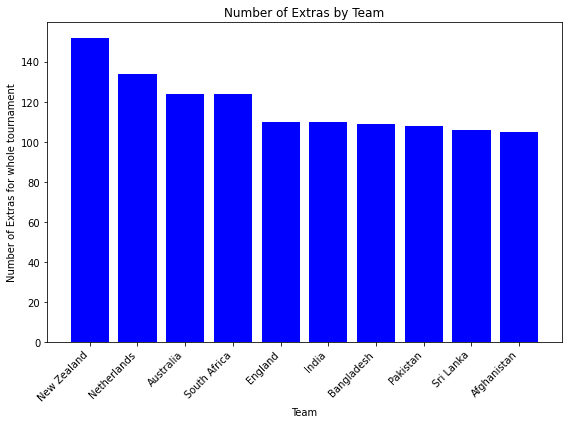

In [539]:
plt.figure(figsize=(8, 6))
plt.bar(rows_with_null['Team'], rows_with_null['R'], color='blue')
plt.xlabel('Team')
plt.ylabel('Number of Extras for whole tournament')
plt.title('Number of Extras by Team')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

In [540]:
df_batting

,Team,BATTING,R,B,M,4s,6s,SR
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000
...,...,...,...,...,...,...,...,...
155,India,Mohammed Shami,4.0,10.0,4.750000,0.0,0.0,67.500000
156,Australia,Josh Hazlewood,4.0,5.0,1.625000,0.0,0.0,83.333333
157,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.500000
158,Australia,Alex Carey †,0.0,2.0,1.000000,0.0,0.0,0.000000


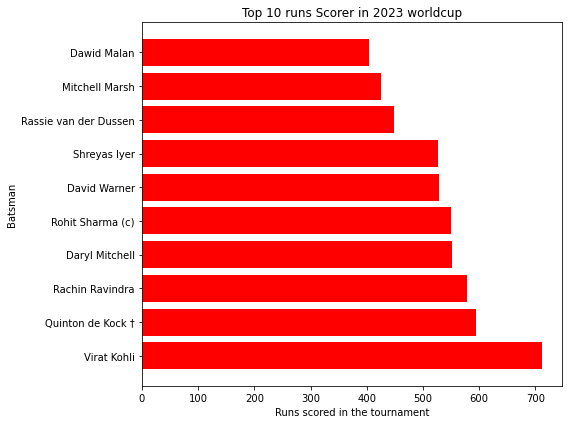

In [541]:
top_runs = df_batting.sort_values(by='R', ascending=False).head(10)

plt.figure(figsize=(8, 6))
plt.barh(top_runs['BATTING'], top_runs['R'], color='red')  # Use barh for horizontal bar chart
plt.xlabel('Runs scored in the tournament')
plt.ylabel('Batsman')
plt.title('Top 10 runs Scorer in 2023 worldcup')
plt.tight_layout()
plt.show()


In [542]:
top_runs

,Team,BATTING,R,B,M,4s,6s,SR
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000
5,Australia,David Warner,528.0,491.0,75.800000,49.0,24.0,108.199000
6,India,Shreyas Iyer,526.0,465.0,64.800000,36.0,24.0,93.005000
7,South Africa,Rassie van der Dussen,448.0,530.0,77.958333,39.0,8.0,64.745000
8,Australia,Mitchell Marsh,426.0,395.0,58.550000,42.0,20.0,80.415250
9,England,Dawid Malan,404.0,400.0,59.575000,50.0,9.0,88.423500


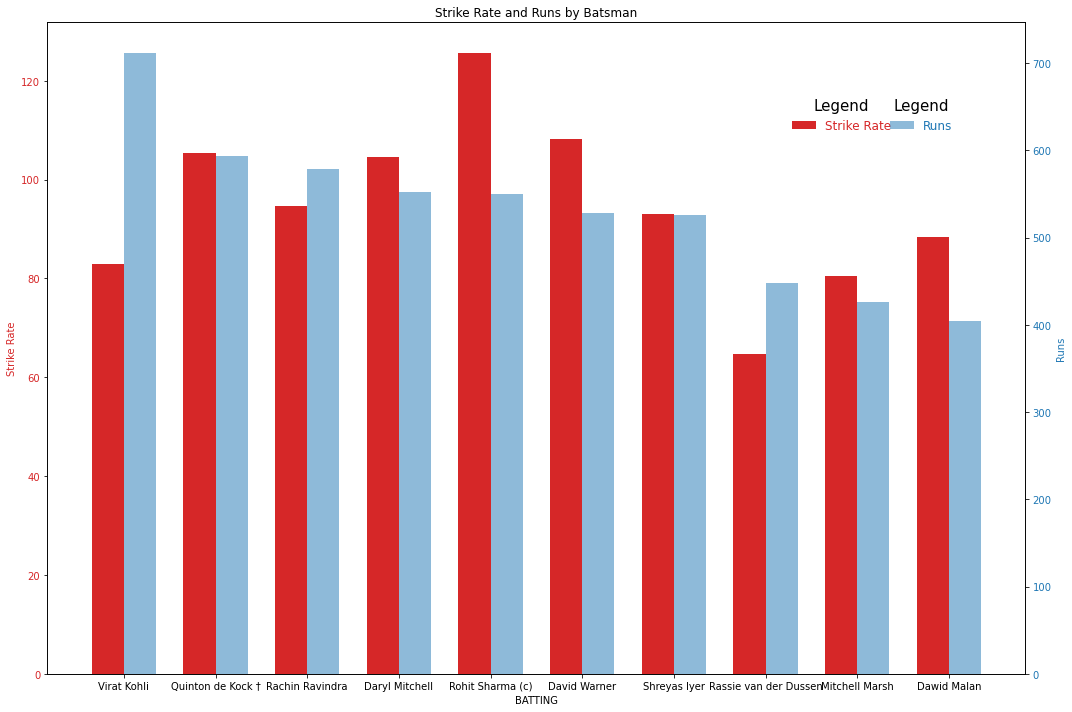

In [543]:
import numpy as np

bar_width = 0.35
index = np.arange(len(top_runs['BATTING']))

fig, ax1 = plt.subplots(figsize=(15, 10))

color_sr = 'tab:red'
bars_sr = ax1.bar(index, top_runs['SR'], bar_width, color=color_sr, label='Strike Rate')
ax1.set_xlabel('BATTING')
ax1.set_ylabel('Strike Rate', color=color_sr)
ax1.tick_params(axis='y', labelcolor=color_sr)

ax2 = ax1.twinx()
color_r = 'tab:blue'
bars_r = ax2.bar(index + bar_width, top_runs['R'], bar_width, color=color_r, alpha=0.5, label='Runs')
ax2.set_ylabel('Runs', color=color_r)
ax2.tick_params(axis='y', labelcolor=color_r)

plt.title('Strike Rate and Runs by Batsman')

ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(top_runs['BATTING'])

plt.xticks(rotation=45, ha='right')

ax1.legend(bars_sr, ['Strike Rate'], loc='upper left', bbox_to_anchor=(0.75, 0.9), frameon=False, title='Legend', title_fontsize='15', fontsize='12', labelcolor=color_sr)
ax2.legend(bars_r, ['Runs'], loc='upper left', bbox_to_anchor=(0.85, 0.9), frameon=False, title='Legend', title_fontsize='15', fontsize='12', labelcolor=color_r)

plt.tight_layout()
plt.show()


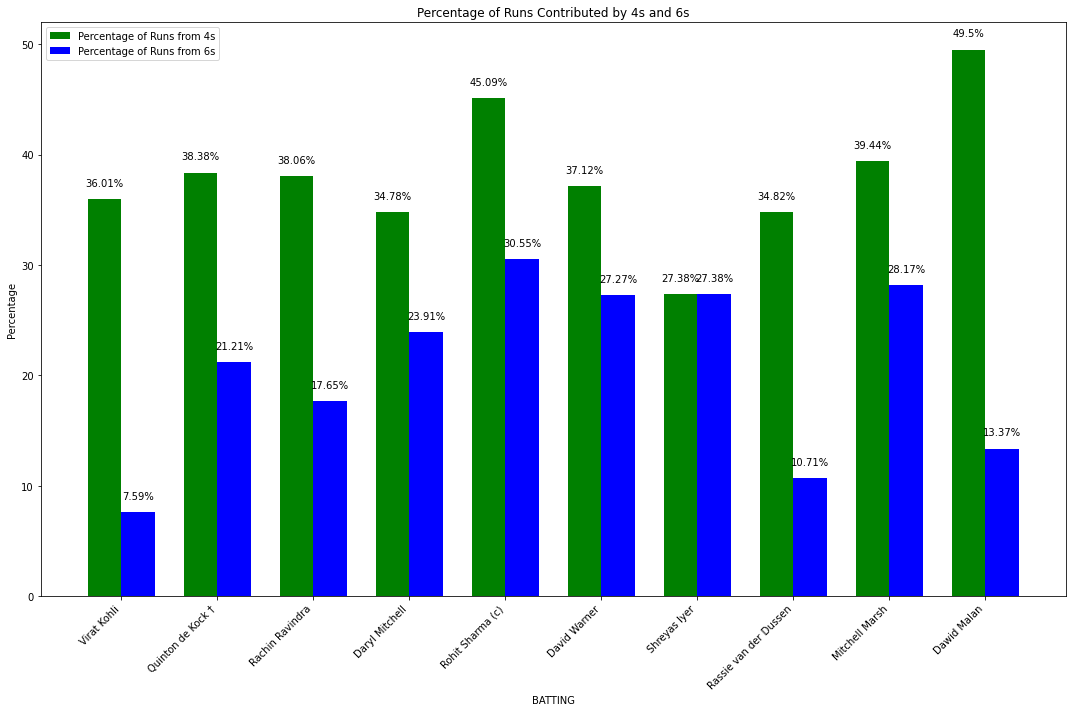

In [544]:
top_runs['4s_percentage'] = (top_runs['4s'] * 4 / top_runs['R']) * 100
top_runs['6s_percentage'] = (top_runs['6s'] * 6 / top_runs['R']) * 100

bar_width = 0.35
index = np.arange(len(top_runs['BATTING']))

fig, ax = plt.subplots(figsize=(15, 10))

bars1 = ax.bar(index, top_runs['4s_percentage'], bar_width, color='green', label='Percentage of Runs from 4s')
bars2 = ax.bar(index + bar_width, top_runs['6s_percentage'], bar_width, color='blue', label='Percentage of Runs from 6s')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_runs['BATTING'])

plt.xticks(rotation=45, ha='right')

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{round(yval, 2)}%', ha='center', va='bottom')

plt.title('Percentage of Runs Contributed by 4s and 6s')
plt.xlabel('BATTING')
plt.ylabel('Percentage')

plt.legend()

plt.tight_layout()
plt.show()


In [545]:
df_batting

,Team,BATTING,R,B,M,4s,6s,SR
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000
...,...,...,...,...,...,...,...,...
155,India,Mohammed Shami,4.0,10.0,4.750000,0.0,0.0,67.500000
156,Australia,Josh Hazlewood,4.0,5.0,1.625000,0.0,0.0,83.333333
157,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.500000
158,Australia,Alex Carey †,0.0,2.0,1.000000,0.0,0.0,0.000000


In [546]:
df_batting['Team'].unique()

array(['India', 'South Africa', 'New Zealand', 'Australia', 'England',
       'Pakistan', 'Afghanistan', 'Sri Lanka', 'Bangladesh',
       'Netherlands'], dtype=object)

In [547]:
#Created a new calculated column Avg runs of bats man
matches_played_mapping = {
    'India': 10,
    'South Africa': 10,
    'New Zealand': 10,
    'Australia': 10,
    'England': 9,
    'Pakistan': 9,
    'Afghanistan': 9,
    'Sri Lanka': 9,
    'Bangladesh': 9,
    'Netherlands': 9
}

df_batting['avg'] = df_batting.apply(lambda row: row['R'] / matches_played_mapping[row['Team']], axis=1)


In [548]:
df_batting

,Team,BATTING,R,B,M,4s,6s,SR,avg
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000,71.100000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417,59.400000
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917,57.800000
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750,55.200000
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000,55.000000
...,...,...,...,...,...,...,...,...,...
155,India,Mohammed Shami,4.0,10.0,4.750000,0.0,0.0,67.500000,0.400000
156,Australia,Josh Hazlewood,4.0,5.0,1.625000,0.0,0.0,83.333333,0.400000
157,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.500000,0.222222
158,Australia,Alex Carey †,0.0,2.0,1.000000,0.0,0.0,0.000000,0.000000


In [549]:
df_batting.sort_values(by='avg', ascending=False)[:10]

,Team,BATTING,R,B,M,4s,6s,SR,avg
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000,71.100000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417,59.400000
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917,57.800000
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750,55.200000
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000,55.000000
5,Australia,David Warner,528.0,491.0,75.800000,49.0,24.0,108.199000,52.800000
6,India,Shreyas Iyer,526.0,465.0,64.800000,36.0,24.0,93.005000,52.600000
9,England,Dawid Malan,404.0,400.0,59.575000,50.0,9.0,88.423500,44.888889
7,South Africa,Rassie van der Dussen,448.0,530.0,77.958333,39.0,8.0,64.745000,44.800000
11,Pakistan,Mohammad Rizwan †,395.0,414.0,77.250000,38.0,5.0,96.765000,43.888889


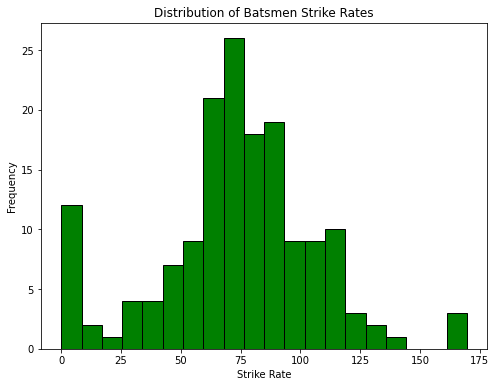

In [550]:
plt.figure(figsize=(8, 6))
plt.hist(df_batting['SR'], bins=20, color='green', edgecolor='black')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Batsmen Strike Rates')
plt.show()


Scoring Rate Distribution:

The x-axis represents the bins or intervals of strike rates, and the y-axis represents the frequency or count of batsmen falling into each bin.

Above histogram allows you to observe the distribution pattern of strike rates across the dataset.

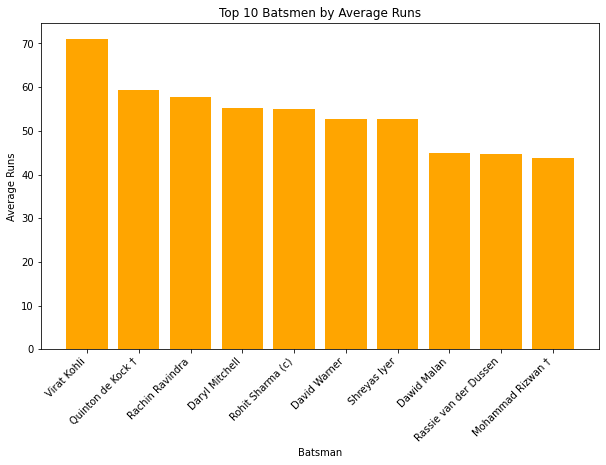

In [551]:
df_sorted = df_batting.sort_values(by='avg', ascending=False)

top_10 = df_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10['BATTING'], top_10['avg'], color='orange')
plt.xlabel('Batsman')
plt.ylabel('Average Runs')
plt.title('Top 10 Batsmen by Average Runs')
plt.xticks(rotation=45, ha='right')
plt.show()


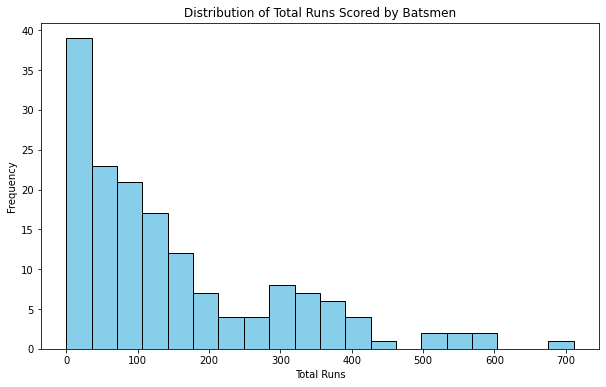

In [552]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_batting['R'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Total Runs Scored by Batsmen')
plt.show()


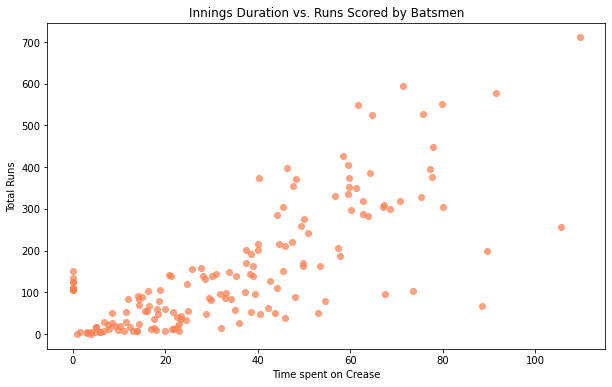

In [553]:
plt.figure(figsize=(10, 6))
plt.scatter(df_batting['M'], df_batting['R'], color='coral', alpha=0.7)
plt.xlabel('Time spent on Crease')
plt.ylabel('Total Runs')
plt.title('Innings Duration vs. Runs Scored by Batsmen')
plt.show()


In [554]:
# it suggests a positive correlation - more minutes spent may result in more runs.

In [555]:
df_batting.corr()

,R,B,M,4s,6s,SR,avg
R,1.000000,0.948451,0.765709,0.946609,0.776380,0.312077,0.997380
B,0.948451,1.000000,0.834366,0.935515,0.657989,0.324181,0.953613
M,0.765709,0.834366,1.000000,0.784180,0.557498,0.433561,0.772885
4s,0.946609,0.935515,0.784180,1.000000,0.702828,0.389721,0.945934
6s,0.776380,0.657989,0.557498,0.702828,1.000000,0.470504,0.759552
SR,0.312077,0.324181,0.433561,0.389721,0.470504,1.000000,0.306660
avg,0.997380,0.953613,0.772885,0.945934,0.759552,0.306660,1.000000


In [556]:
df_batting

,Team,BATTING,R,B,M,4s,6s,SR,avg
0,India,Virat Kohli,711.0,784.0,109.700000,64.0,9.0,82.956000,71.100000
1,South Africa,Quinton de Kock †,594.0,555.0,71.333333,57.0,21.0,105.430417,59.400000
2,New Zealand,Rachin Ravindra,578.0,543.0,91.583333,55.0,17.0,94.602917,57.800000
3,New Zealand,Daryl Mitchell,552.0,497.0,79.825000,48.0,22.0,104.484750,55.200000
4,India,Rohit Sharma (c),550.0,443.0,61.700000,62.0,28.0,125.526000,55.000000
...,...,...,...,...,...,...,...,...,...
155,India,Mohammed Shami,4.0,10.0,4.750000,0.0,0.0,67.500000,0.400000
156,Australia,Josh Hazlewood,4.0,5.0,1.625000,0.0,0.0,83.333333,0.400000
157,Afghanistan,Fazalhaq Farooqi,2.0,9.0,3.000000,0.0,0.0,12.500000,0.222222
158,Australia,Alex Carey †,0.0,2.0,1.000000,0.0,0.0,0.000000,0.000000


In [557]:
aggregated_final_bowling_Stats

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
0,Afghanistan,Azmatullah Omarzai,38.0,1,270.0,7,6.859500,110.0,29,9,6,1
1,Afghanistan,Fazalhaq Farooqi,40.0,2,228.0,6,5.906667,147.0,30,5,9,0
2,Afghanistan,Mohammad Nabi,61.3,4,254.0,8,4.798500,213.0,16,7,3,0
3,Afghanistan,Mujeeb Ur Rahman,81.5,2,458.0,8,5.609250,257.0,38,13,9,0
4,Afghanistan,Naveen-ul-Haq,53.0,1,352.0,8,6.663667,152.0,34,11,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Sri Lanka,Dushmantha Chameera,31.2,3,196.0,2,6.418333,99.0,21,7,2,0
98,Sri Lanka,Kasun Rajitha,49.0,1,336.0,8,7.501250,150.0,34,11,12,0
99,Sri Lanka,Lahiru Kumara,11.0,0,82.0,3,8.375000,33.0,9,3,0,0
100,Sri Lanka,Maheesh Theekshana,71.2,1,382.0,6,5.212000,207.0,29,5,13,0


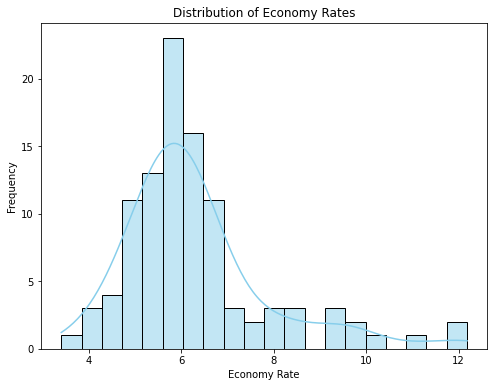

In [558]:
plt.figure(figsize=(8, 6))
sns.histplot(aggregated_final_bowling_Stats['ECON'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Economy Rates')
plt.xlabel('Economy Rate')
plt.ylabel('Frequency')
plt.show()

In [561]:
most_wickets_bowler = aggregated_final_bowling_Stats[aggregated_final_bowling_Stats['W'] == aggregated_final_bowling_Stats['W'].max()]


In [562]:
most_wickets_bowler

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
42,India,Mohammed Shami,48.5,4,257.0,24,5.2475,183.0,27,7,9,0


In [566]:
df_sorted = aggregated_final_bowling_Stats.sort_values(by=['W', 'ECON', 'M'], ascending=[False, True, False])

# Select the top 10 bowlers
top_10_bowlers = df_sorted.head(10)

In [567]:
top_10_bowlers

,Team,BOWLING,O,M,R,W,ECON,0s,4s,6s,WD,NB
42,India,Mohammed Shami,48.5,4,257.0,24,5.247500,183.0,27,7,9,0
8,Australia,Adam Zampa,96.0,1,515.0,23,5.251333,261.0,33,14,9,0
94,Sri Lanka,Dilshan Madushanka,77.8,4,525.0,21,6.834500,241.0,63,8,23,3
40,India,Jasprit Bumrah,91.5,9,373.0,20,3.863500,372.0,38,6,22,0
82,South Africa,Gerald Coetzee,63.3,1,396.0,20,6.322000,214.0,47,11,10,2
78,Pakistan,Shaheen Shah Afridi,81.0,3,481.0,18,5.845500,273.0,55,10,22,0
87,South Africa,Marco Jansen,68.6,3,450.0,17,6.370000,259.0,59,10,36,5
45,India,Ravindra Jadeja,92.9,4,398.0,16,4.332667,315.0,25,9,2,2
11,Australia,Josh Hazlewood,93.1,8,449.0,16,4.772167,334.0,49,8,13,0
67,New Zealand,Mitchell Santner,92.4,4,449.0,16,5.035000,276.0,24,14,5,0


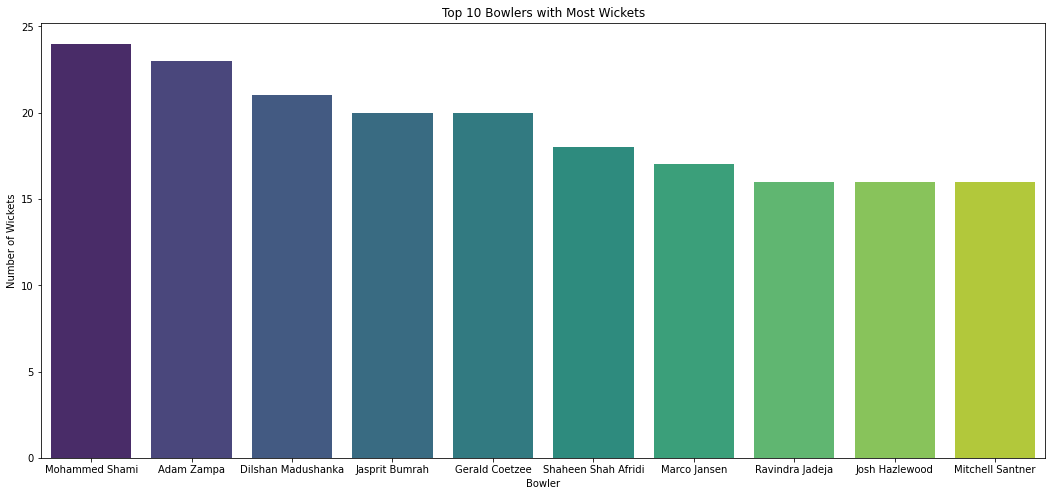

In [573]:
plt.figure(figsize=(18,8))
sns.barplot(x='BOWLING', y='W', data=top_10_bowlers, palette='viridis')
plt.title('Top 10 Bowlers with Most Wickets')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.show()

In [575]:
Summary_df

,Team 1,Team 2,Match,Result,Links
0,England,New Zealand,England vs New Zealand,New Zealand won by 9 wickets (with 82 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/england-vs-new-zealand-1st-match-1384392/full-scorecard
1,Pakistan,Netherlands,Pakistan vs Netherlands,Pakistan won by 81 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-pakistan-2nd-match-1384393/full-scorecard
2,Afghanistan,Bangladesh,Afghanistan vs Bangladesh,Bangladesh won by 6 wickets (with 92 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/afghanistan-vs-bangladesh-3rd-match-1384394/full-scorecard
3,South Africa,Sri Lanka,South Africa vs Sri Lanka,South Africa won by 102 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/south-africa-vs-sri-lanka-4th-match-1384395/full-scorecard
4,Australia,India,Australia vs India,India won by 6 wickets (with 52 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-australia-5th-match-1384396/full-scorecard
5,New Zealand,Netherlands,New Zealand vs Netherlands,New Zealand won by 99 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-new-zealand-6th-match-1384397/full-scorecard
6,England,Bangladesh,England vs Bangladesh,England won by 137 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/bangladesh-vs-england-7th-match-1384398/full-scorecard
7,Sri Lanka,Pakistan,Sri Lanka vs Pakistan,Pakistan won by 6 wickets (with 10 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/pakistan-vs-sri-lanka-8th-match-1384399/full-scorecard
8,Afghanistan,India,Afghanistan vs India,India won by 8 wickets (with 90 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-afghanistan-9th-match-1384400/full-scorecard
9,South Africa,Australia,South Africa vs Australia,South Africa won by 134 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/australia-vs-south-africa-10th-match-1384401/full-scorecard


In [576]:
def extract_winner(result_text):
    return result_text.split(' won')[0]

Summary_df['winner'] = Summary_df['Result'].apply(extract_winner)

Summary_df

,Team 1,Team 2,Match,Result,Links,winner
0,England,New Zealand,England vs New Zealand,New Zealand won by 9 wickets (with 82 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/england-vs-new-zealand-1st-match-1384392/full-scorecard,New Zealand
1,Pakistan,Netherlands,Pakistan vs Netherlands,Pakistan won by 81 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-pakistan-2nd-match-1384393/full-scorecard,Pakistan
2,Afghanistan,Bangladesh,Afghanistan vs Bangladesh,Bangladesh won by 6 wickets (with 92 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/afghanistan-vs-bangladesh-3rd-match-1384394/full-scorecard,Bangladesh
3,South Africa,Sri Lanka,South Africa vs Sri Lanka,South Africa won by 102 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/south-africa-vs-sri-lanka-4th-match-1384395/full-scorecard,South Africa
4,Australia,India,Australia vs India,India won by 6 wickets (with 52 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-australia-5th-match-1384396/full-scorecard,India
5,New Zealand,Netherlands,New Zealand vs Netherlands,New Zealand won by 99 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/netherlands-vs-new-zealand-6th-match-1384397/full-scorecard,New Zealand
6,England,Bangladesh,England vs Bangladesh,England won by 137 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/bangladesh-vs-england-7th-match-1384398/full-scorecard,England
7,Sri Lanka,Pakistan,Sri Lanka vs Pakistan,Pakistan won by 6 wickets (with 10 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/pakistan-vs-sri-lanka-8th-match-1384399/full-scorecard,Pakistan
8,Afghanistan,India,Afghanistan vs India,India won by 8 wickets (with 90 balls remaining),https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/india-vs-afghanistan-9th-match-1384400/full-scorecard,India
9,South Africa,Australia,South Africa vs Australia,South Africa won by 134 runs,https://www.espncricinfo.com/series/icc-cricket-world-cup-2023-24-1367856/australia-vs-south-africa-10th-match-1384401/full-scorecard,South Africa


In [577]:
Summary_df.to_csv('Matchdetails.csv')

In [578]:
aggregated_final_bowling_Stats.to_csv('Bowlingstats.csv')

In [580]:
result_df.to_csv('Battingstats.csv')